In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
data=pd.read_excel('heart.xlsx')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
print(data.shape)
print(data.info)
print(data.columns)

(303, 14)
<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0

In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
print(data.describe())


              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [5]:
print(data.corr())

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

<AxesSubplot:>

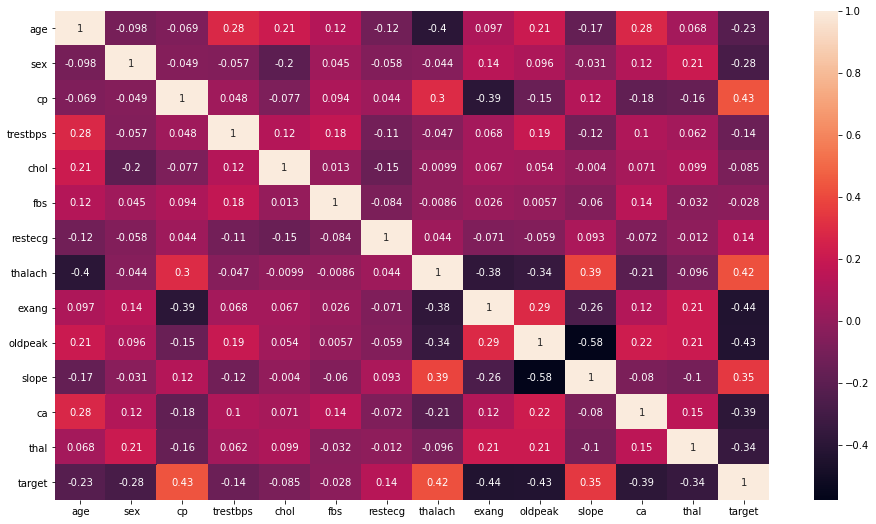

In [6]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(),annot=True)

In [202]:
data['Chest Pain Type']=data['cp'].replace([0,1,2,3],['Typical', 'Asymptotic', 'Nonanginal', 'Nontypical'])
data['Fasting Blood Sugar']=data['fbs'].replace([1,0],['Fasting blood sugar > 120 mg/dl','Fasting blood sugar < 120 mg/dl'])
data['Exercise induced angina']=data['exang1'].replace([1,0],['Exercise induced angina','Not Exercise induced angina'])
data['Thalassemia']=data['thal'].replace([1,2,3],['Normal','Fixed Defect','Reversable Defect'])
data['Diagnosis of heart disease']=data['target'].replace([1,0],['Heart disease diagnoised','Heart disease not diagnoised'])
data['Sex']=data['sex'].replace([1,0],['Male','Female'])
data['Resting blood pressure']=data['trestbps']
data['Serum cholestoral in mg/dl']=data['chol']
data['Resting electrocardiographic results']=data['restecg']
data[' ST depression induced by exercise relative to rest']=data['oldpeak']
data['Number of major vessels colored by flourosopy']=data['ca']
data['Slope of the peak exercise ST segment']=data['slope']
data['maximum heart rate achieved']=data['thalach']

In [203]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,...,Thalassemia,Diagnosis of heart disease,Sex,Resting blood pressure,Serum cholestoral in mg/dl,Resting electrocardiographic results,ST depression induced by exercise relative to rest,Number of major vessels colored by flourosopy,Slope of the peak exercise ST segment,maximum heart rate achieved
0,63,1,3,145,233,1,0,150,2.3,0,...,Normal,Heart disease diagnoised,Male,145,233,0,2.3,0,0,150
1,37,1,2,130,250,0,1,187,3.5,0,...,Fixed Defect,Heart disease diagnoised,Male,130,250,1,3.5,0,0,187
2,41,0,1,130,204,0,0,172,1.4,2,...,Fixed Defect,Heart disease diagnoised,Female,130,204,0,1.4,0,2,172
3,56,1,1,120,236,0,1,178,0.8,2,...,Fixed Defect,Heart disease diagnoised,Male,120,236,1,0.8,0,2,178
4,57,0,0,120,354,0,1,163,0.6,2,...,Fixed Defect,Heart disease diagnoised,Female,120,354,1,0.6,0,2,163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,0.2,1,...,Reversable Defect,Heart disease not diagnoised,Female,140,241,1,0.2,0,1,123
299,45,1,3,110,264,0,1,132,1.2,1,...,Reversable Defect,Heart disease not diagnoised,Male,110,264,1,1.2,0,1,132
300,68,1,0,144,193,1,1,141,3.4,1,...,Reversable Defect,Heart disease not diagnoised,Male,144,193,1,3.4,2,1,141
301,57,1,0,130,131,0,1,115,1.2,1,...,Reversable Defect,Heart disease not diagnoised,Male,130,131,1,1.2,1,1,115


KeyError: "['cp1'] not found in axis"

In [80]:
sex2=data.sex1.value_counts()
sex2

Male      207
Female     96
Name: sex1, dtype: int64

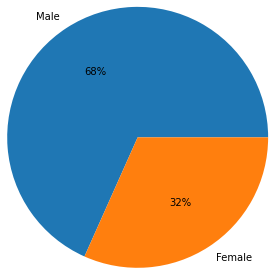

In [82]:
plt.pie(sex2,labels=['Male','Female'],radius=1.5,autopct='%0.0f%%')
plt.show()


In [72]:
cp3=data.cp1.value_counts()
cp3

Typical       143
Nonanginal     87
Asymptotic     50
Nontypical     23
Name: cp1, dtype: int64

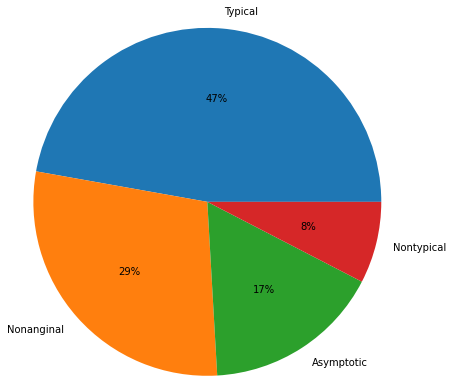

In [83]:
plt.pie(cp3,labels=['Typical','Nonanginal','Asymptotic','Nontypical'],radius=2,autopct='%0.0f%%')
plt.show()


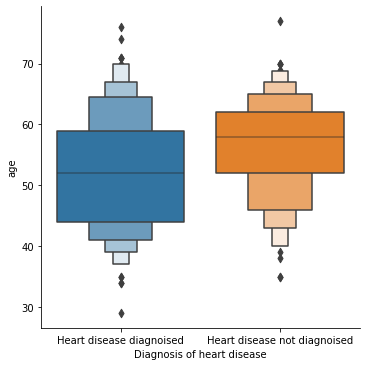

In [145]:
sns.catplot(y='age',x='Diagnosis of heart disease',data=data,kind='boxen')


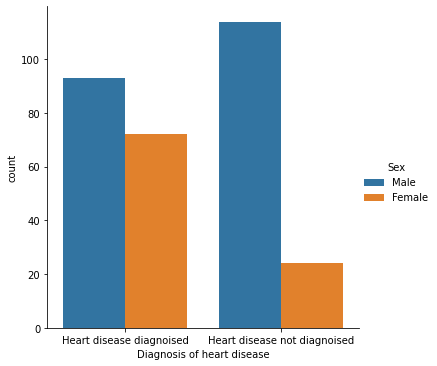

In [146]:
sns.catplot(x='Diagnosis of heart disease',data=data,hue='Sex',kind='count')
#In the patients that had not been diagnoised majority where male
#In the patients that had been diagnoised approx. equal male to female ratio

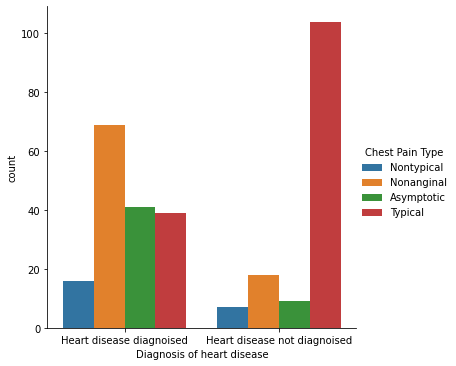

In [147]:
sns.catplot(x='Diagnosis of heart disease',data=data,hue='Chest Pain Type',kind='count')
#In the patients that had been diagnoised majority chest pains were of the type Non-Anginal,
#followed by equal typical and aysmptomatic chestpain& least nontypical chestpain
#In the patients that had not been diagnoised majority chest pains were of the type Typical
#followed by nonanginal & least nontypical&asymptomatic chestpains

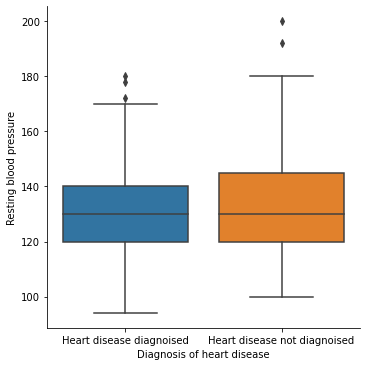

In [161]:
sns.catplot(x='Diagnosis of heart disease',y='Resting blood pressure',data=data,kind='box')
#Mean of RBS is about 130 for both diagnoised and not diagnoised patients.
#The min val being below 100 for diagnoised and approx. 100 for not diagnoised patients.
#The max value being approx 170 with outliers till 180 for diagnoised and max value 180 and outliers till 200 for not diagnoised patients.        
            

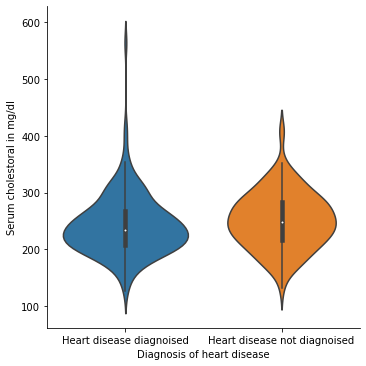

In [172]:
sns.catplot(x='Diagnosis of heart disease',y='Serum cholestoral in mg/dl',data=data,kind='violin')
#The median serum chol for patients diagnoised with heart diseases is lower than those not diagnoised
#The InterQuartileRanges are approximately same with outliers exceeding 400 for patients diagnoised with heart diseases

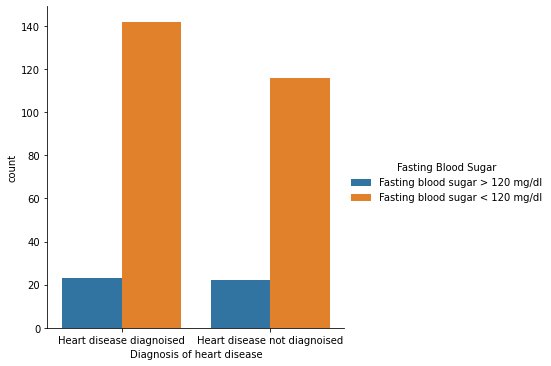

In [182]:
sns.catplot(x='Diagnosis of heart disease',hue='Fasting Blood Sugar',data=data,kind='count')
#The fasting blood sugar <120 for majority of diagnoised&diagnoised patients
#The count of fasting blood sugar <120 was more in diagnoised patients
#The count of fasting blood sugar >120 was same in both diagnoised & undiagnoised patients

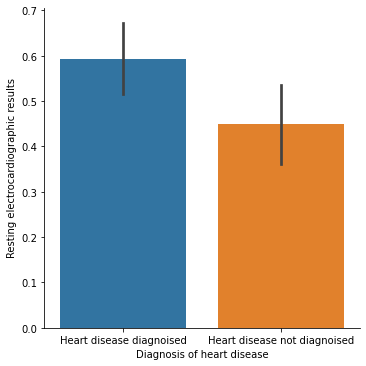

In [216]:
sns.catplot(x='Diagnosis of heart disease',y='Resting electrocardiographic results',data=data,kind='bar')


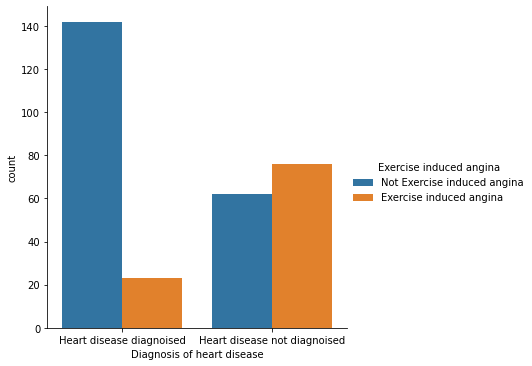

In [191]:
sns.catplot(x='Diagnosis of heart disease',hue='Exercise induced angina',data=data,kind='count')
#Cases of Non-Exercise induced Angina was more in heart diagnoised patients by a huge margin compared to exercise induced angina
#Cases of Exercise induced Angina was more in heart diagnoised patients by a small margin

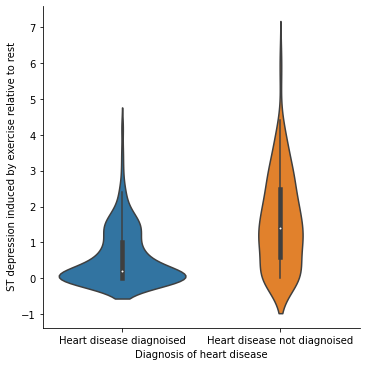

In [192]:
sns.catplot(x='Diagnosis of heart disease',y=' ST depression induced by exercise relative to rest',data=data,kind='violin')
#Uniform distribution of St depression induced by exercise for non-diagonised hert disease patients
#More distribution of St depression induced by exercise for non-diagonised hert disease patients around 0

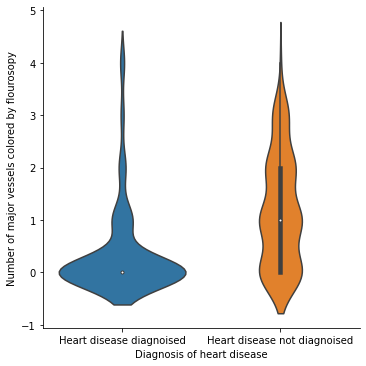

In [199]:
sns.catplot(x='Diagnosis of heart disease',y='Number of major vessels colored by flourosopy',data=data,kind='violin')
#No of major blood vessels coloured were majorly distributed at 0 for heart disease diagnoised patients
#No of major blood vessels coloured were evenly distributed for non-heart disease diagnoised patients

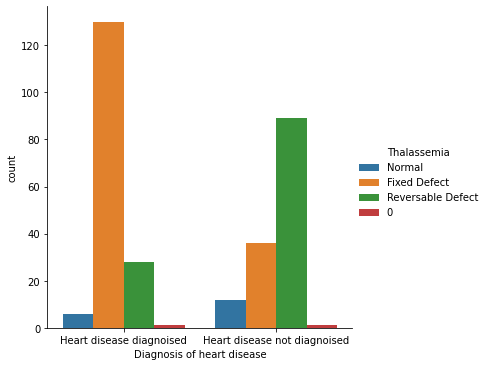

In [200]:
sns.catplot(x='Diagnosis of heart disease',hue='Thalassemia',data=data,kind='count')

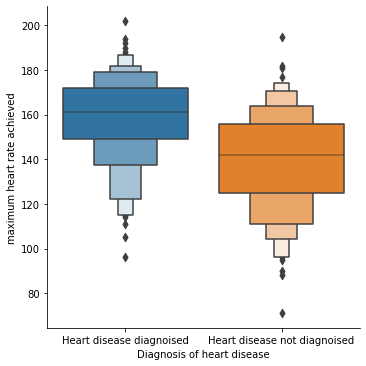

In [206]:
sns.catplot(x='Diagnosis of heart disease',y='maximum heart rate achieved',data=data,kind='boxen')
#Median of maximum heart rate achieved is around 160 for patients diagnoised with heart disease 
#Median of maximum heart rate achieved is around 140 for patients diagnoised with heart disease 

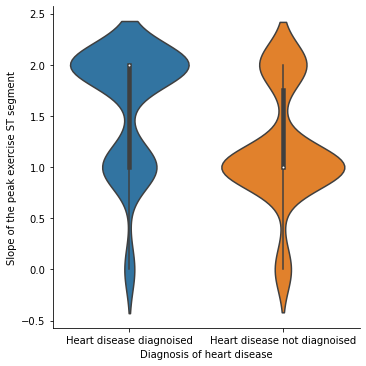

In [222]:
sns.catplot(x='Diagnosis of heart disease',y='Slope of the peak exercise ST segment',data=data,kind='violin')
#Maximum distribution of Slope of the peak exercise ST segment around 2 followed by 1 and least at 0 for Diagnoised patients
#Maximum distribution of Slope of the peak exercise ST segment around 1 followed by 2 and least at 0 for Diagnoised patients

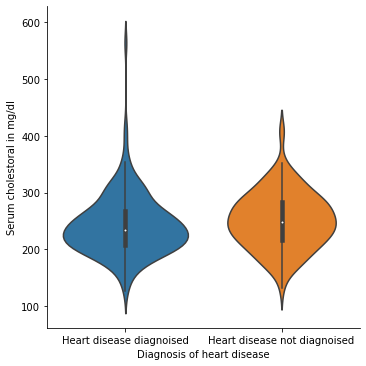

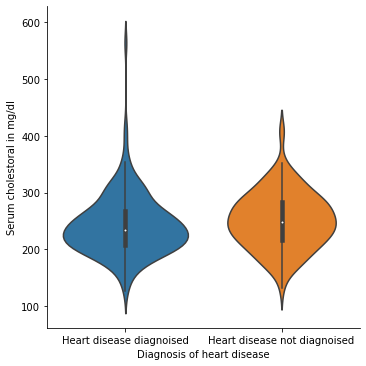

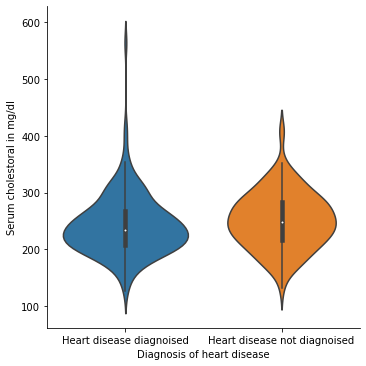